In [1]:
import random

from d2l import torch as d2l
import torch


def synthetic_data(w, b, num_examples):
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

In [2]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

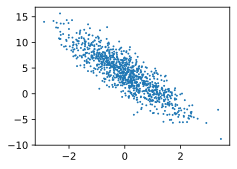

In [3]:
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1)

In [4]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i+batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [5]:
batch_size = 10 # 这个 batch_size 有问题，此代码样本数 / batch_size 必须整除
for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-1.2451,  1.7167],
        [-0.9092,  0.4307],
        [-1.3277, -1.3751],
        [-0.0275,  1.8217],
        [ 1.6262, -0.8532],
        [-1.2505,  0.7406],
        [-0.9303,  1.3499],
        [-1.3350, -1.7594],
        [-0.0393, -1.0988],
        [ 0.1326, -0.8589]]) 
 tensor([[-4.1246],
        [ 0.9120],
        [ 6.2277],
        [-2.0474],
        [10.3512],
        [-0.8312],
        [-2.2460],
        [ 7.5008],
        [ 7.8734],
        [ 7.4093]])


In [6]:
w = torch.zeros((2, 1), requires_grad=True)
# w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [7]:
def linreg(X, w, b):
    return torch.matmul(X, w) + b

In [8]:
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [9]:
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= param.grad * lr / batch_size
            param.grad.zero_()

In [10]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

In [11]:
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch{epoch + 1}, loss:{float(train_l.mean()):f}')

epoch1, loss:0.054181
epoch2, loss:0.000254
epoch3, loss:0.000053


In [12]:
print(f'w的估计误差{true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差{true_b - b}')

w的估计误差tensor([ 0.0003, -0.0006], grad_fn=<SubBackward0>)
b的估计误差tensor([0.0009], grad_fn=<RsubBackward1>)
